In [36]:
import json

file_path = "E:\\term2\\dataset_facebook-hashtag-scraper_2024-02-01_11-12-02-150.json"

# Reading the JSON data
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

data[0]

{'id': 'UzpfSTEwMDA2MzI2Nzk2NjM4Nzo0Nzc4MTQ3NTQzMzc0NTM6NDc3ODE0NzU0MzM3NDUz',
 'postId': '477814754337453',
 'feedbackId': 'ZmVlZGJhY2s6NDc3ODE0NzU0MzM3NDUz',
 'user': {'id': '100063267966387',
  'name': 'Old Gays',
  'profileUrl': 'https://www.facebook.com/OldGays',
  'profilePic': 'https://scontent-hou1-1.xx.fbcdn.net/v/t1.6435-1/201058978_155644946554437_4124363031095696234_n.jpg?stp=cp0_dst-jpg_p40x40&_nc_cat=106&ccb=1-7&_nc_sid=c7e18e&_nc_ohc=w7w1g9IkVDgAX8l2t1B&_nc_ht=scontent-hou1-1.xx&oh=00_AfCZY6VNlx0n0_y0iVMw0IxyDsv4OE4uan5LqDVl1g-FqQ&oe=65E2D4C1'},
 'date': '2022-12-03T15:36:06.000Z',
 'url': 'https://www.facebook.com/OldGays/posts/pfbid02sewXHZaB3sebS4hLJy9t3NxKLnHPLkXp7RRQdspeQLYuNMDpCDRgyVVYrYrZrV1xl',
 'text': 'Do these ANGELS get their wings?! 😇 Meghan Trainor #made #you #look  #dance #transformation #transition #old #gay #lgbt',
 'attachments': [{'thumbnail': 'https://scontent-hou1-1.xx.fbcdn.net/v/t15.5256-10/318126655_162222966504226_493607899203396935_n.jpg?stp=dst

In [37]:
# Extracting only username and text
reduced_data = [{'username': tweet['user']['name'], 'text': tweet['text']} for tweet in data]

len(reduced_data), reduced_data[0]

(200,
 {'username': 'Old Gays',
  'text': 'Do these ANGELS get their wings?! 😇 Meghan Trainor #made #you #look  #dance #transformation #transition #old #gay #lgbt'})

In [51]:
file_path = "E:\\term2\\dataset_instagram-hashtag-scraper.json"

# Reading the JSON data
with open(file_path, 'r', encoding='utf-8') as file:
    data1 = json.load(file)
del data1[0]
len(data1)

100

In [52]:
# Assign numerical order as username
reduced_data1 = [{'username': str(i + 1), 'text': tweet['caption']} for i, tweet in enumerate(data1)]

len(reduced_data1), reduced_data1[0]


(100,
 {'username': '1',
  'text': 'Happy Valentine, Wood Dragon!! \n•\n#Harlekinno #BL #Homoerotic #LGBT #DigitalArt #Drawing #OriginalCharacter #CharacterDesign #HappyNewYearChinese #NewYearChinese202 #202 #FelizAñoNuevoChino #AñoNuevoChino2023 #WoodDragonYear #DragonYear #SanValentineDay #SanValentin #GayCouple'})

In [53]:
file_path = "E:\\term2\\dataset_twitter-scraper_2024-02-01_11-39-36-786.json"

# Reading the JSON data
with open(file_path, 'r', encoding='utf-8') as file:
    data2 = json.load(file)

data2[0]

{'bookmark_count': 0,
 'bookmarked': False,
 'created_at': 'Thu Feb 01 11:34:38 +0000 2024',
 'conversation_id_str': '1749395428120899721',
 'entities': {'hashtags': [],
  'symbols': [],
  'timestamps': [],
  'urls': [],
  'user_mentions': [{'id_str': '1673291810733453317',
    'name': 'Matheus Lima ⬛⬜🟨',
    'screen_name': 'matheusmhrl',
    'indices': [0, 12]},
   {'id_str': '1626349548082716673',
    'name': 'Ciência Freestyle',
    'screen_name': 'ciencia_fstyle',
    'indices': [13, 28]},
   {'id_str': '1690083907952082944',
    'name': 'Comunismo Freestyle',
    'screen_name': 'ComunismoStyle',
    'indices': [29, 44]}]},
 'favorite_count': 0,
 'favorited': False,
 'full_text': '@matheusmhrl @ciencia_fstyle @ComunismoStyle Ser LGBT não é ideologia, já  o movimento tem intuito de proteger as pessoas que estão incluídas na sigla. Não ocorre doutrinação, porque já se nasce assim. Na imagem mostra uma realidade, afinal se existem pessoas trans na vida adulta essas pessoas eram trans 

In [55]:
# Extracting only username and text
reduced_data2 = [{'username': tweet['user']['name'], 'text': tweet['full_text']} for tweet in data2]

len(reduced_data2), reduced_data2[0]

(256,
 {'username': 'leviatã fucking rockwell',
  'text': '@matheusmhrl @ciencia_fstyle @ComunismoStyle Ser LGBT não é ideologia, já  o movimento tem intuito de proteger as pessoas que estão incluídas na sigla. Não ocorre doutrinação, porque já se nasce assim. Na imagem mostra uma realidade, afinal se existem pessoas trans na vida adulta essas pessoas eram trans crianças.'})

In [56]:
combined_data = reduced_data + reduced_data1 + reduced_data2
len(combined_data)

556

In [22]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

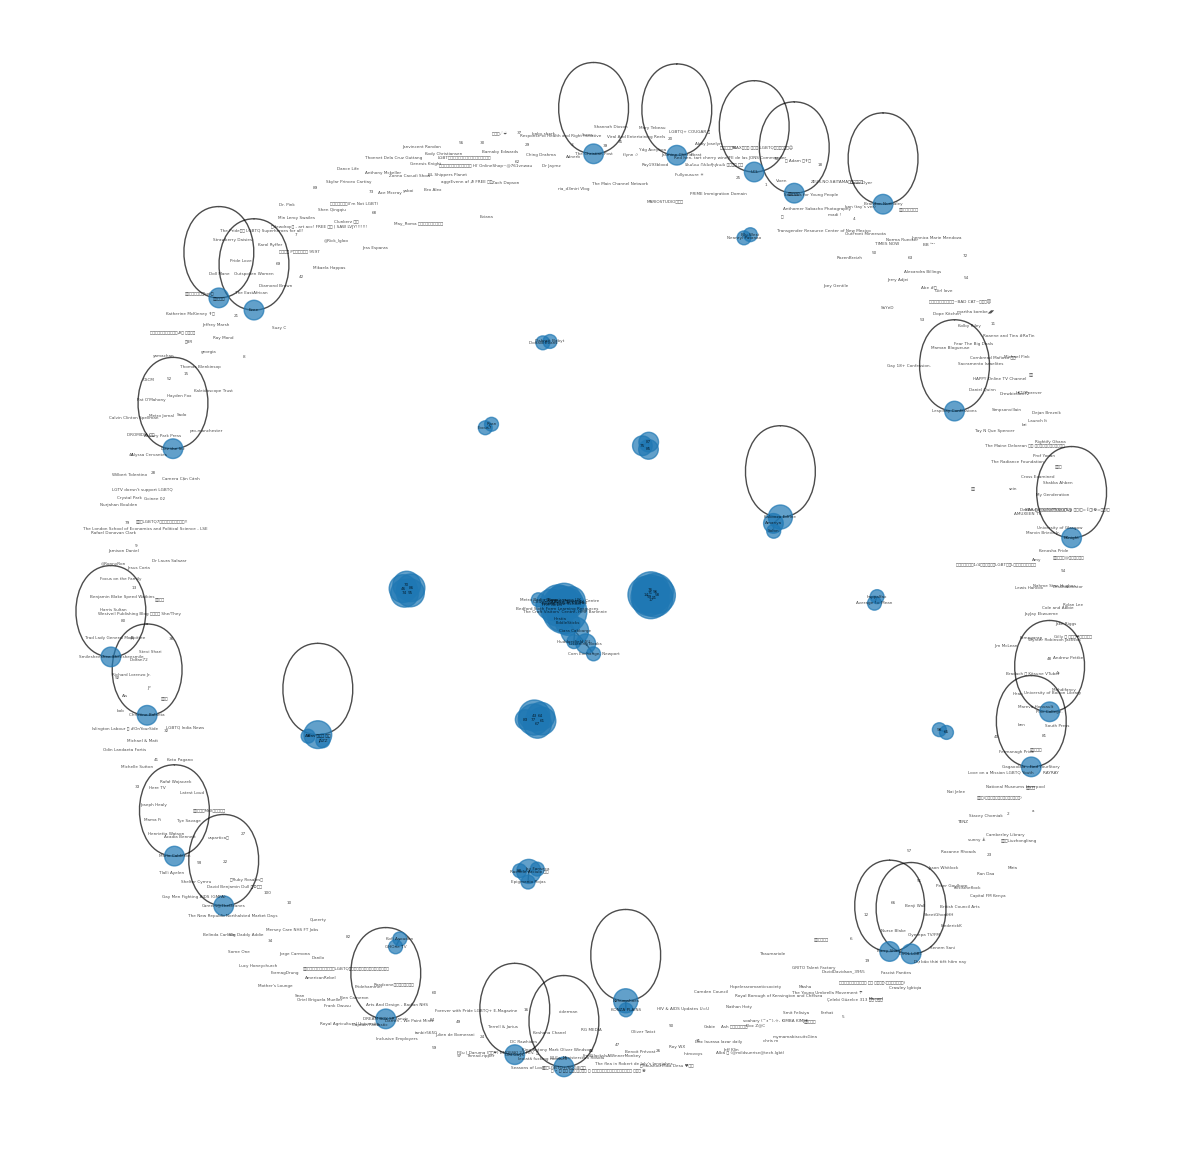

In [59]:
# Preprocess and vectorize the text
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform([tweet['text'] for tweet in combined_data])

# Create a graph
G = nx.Graph()

# Add nodes
for tweet in combined_data:
    G.add_node(tweet['username'])

# Add edges based on content similarity
similarity_matrix = cosine_similarity(tfidf_matrix)
threshold = 0.3  # Define your threshold
for i, username1 in enumerate(tweet['username'] for tweet in combined_data):
    for j, username2 in enumerate(tweet['username'] for tweet in combined_data):
        if i < j and similarity_matrix[i, j] > threshold:
            G.add_edge(username1, username2)

# Now G contains your network based on content similarity

plt.figure(figsize=(15, 15))  # Increase the size of the plot

# Compute the degree of each node (number of connections)
degrees = dict(G.degree())

# Draw the network
nx.draw_networkx(G, 
                 node_size=[v * 100 for v in degrees.values()],  # Node size based on degree
                 labels={node: node for node in G.nodes()},  # Add labels to nodes
                 font_size=3,  # Adjust font size
                 alpha=0.7,  # Node transparency
                 with_labels=True)

plt.axis('off')
plt.show()

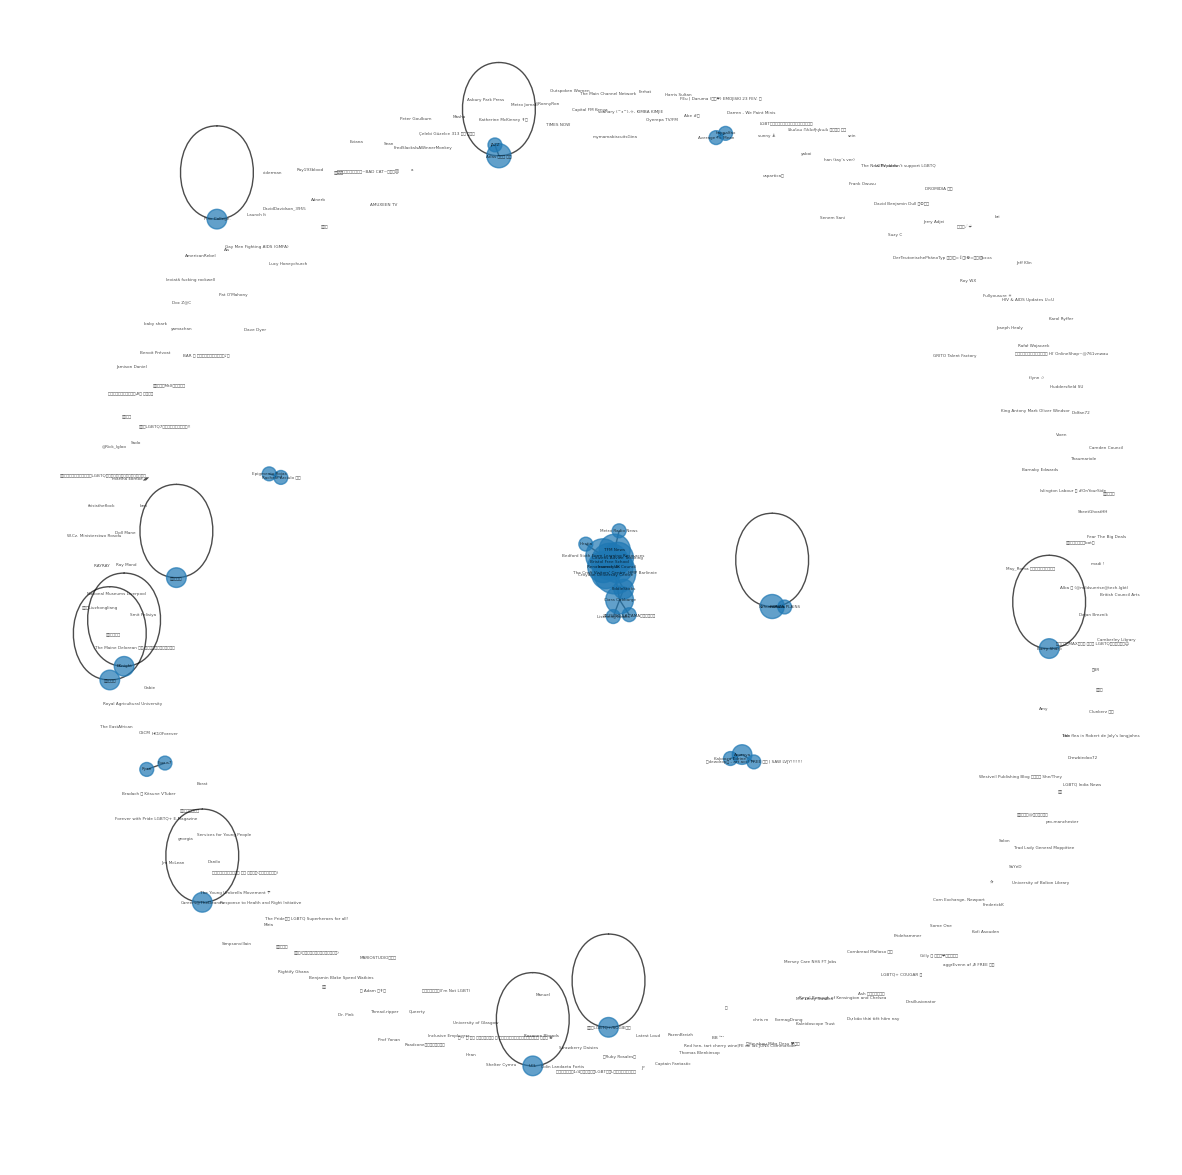

In [63]:
# Preprocess and vectorize the text
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform([tweet['text'] for tweet in reduced_data2])

# Create a graph
G = nx.Graph()

# Add nodes
for tweet in reduced_data2:
    G.add_node(tweet['username'])

# Add edges based on content similarity
similarity_matrix = cosine_similarity(tfidf_matrix)
threshold = 0.3  # Define your threshold
for i, username1 in enumerate(tweet['username'] for tweet in reduced_data2):
    for j, username2 in enumerate(tweet['username'] for tweet in reduced_data2):
        if i < j and similarity_matrix[i, j] > threshold:
            G.add_edge(username1, username2)

# Now G contains your network based on content similarity

plt.figure(figsize=(15, 15))  # Increase the size of the plot

# Compute the degree of each node (number of connections)
degrees = dict(G.degree())

# Draw the network
nx.draw_networkx(G, 
                 node_size=[v * 100 for v in degrees.values()],  # Node size based on degree
                 labels={node: node for node in G.nodes()},  # Add labels to nodes
                 font_size=3,  # Adjust font size
                 alpha=0.7,  # Node transparency
                 with_labels=True)

plt.axis('off')
plt.show()